# Decision tree

In [2]:
import numpy as np
import pandas as pd
# Set random seed to ensure reproducible runs
RSEED = 50

df = pd.read_csv('data/2015.csv').sample(100000, random_state = RSEED)
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
383119,49.0,4.0,b'05192015',b'05',b'19',b'2015',1100.0,2.015009e+09,2.015009e+09,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
55536,9.0,9.0,b'09232015',b'09',b'23',b'2015',1100.0,2.015005e+09,2.015005e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
267093,34.0,10.0,b'11052015',b'11',b'05',b'2015',1100.0,2.015011e+09,2.015011e+09,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
319092,41.0,4.0,b'04062015',b'04',b'06',b'2015',1100.0,2.015002e+09,2.015002e+09,1.0,...,2.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0
420978,54.0,5.0,b'05112015',b'05',b'11',b'2015',1100.0,2.015004e+09,2.015004e+09,NaN,...,1.0,1.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0


### %Data Cleaning%

In [3]:
df = df.select_dtypes('number')

df['_RFHLTH'] = df['_RFHLTH'].replace({2: 0})
df = df.loc[df['_RFHLTH'].isin([0, 1])].copy()
df = df.rename(columns = {'_RFHLTH': 'label'})
df['label'].value_counts()


1.0    81140
0.0    18579
Name: label, dtype: int64

In [4]:

# Remove columns with missing values
df.dropna(axis=1, how='all', inplace=True)
df.drop(columns=['GENHLTH'], inplace=True)
df = df.fillna(df.mean())
# df[df.columns[df.isna().all()].tolist()]
df

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
383119,49.0,4.0,1100.0,2.015009e+09,2.015009e+09,1.0,1.000139,1.0,1.0,1.541892,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,2.312927,2.422808,2.0
55536,9.0,9.0,1100.0,2.015005e+09,2.015005e+09,1.0,1.000000,1.0,1.0,1.000000,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,2.312927,2.422808,2.0
267093,34.0,10.0,1100.0,2.015011e+09,2.015011e+09,1.0,1.000139,1.0,1.0,1.541892,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,2.312927,2.422808,2.0
319092,41.0,4.0,1100.0,2.015002e+09,2.015002e+09,1.0,1.000000,1.0,1.0,1.000000,...,2.0,2.0,2.0,2.0,3.0,1.0,1.0,2.000000,1.000000,2.0
420978,54.0,5.0,1100.0,2.015004e+09,2.015004e+09,1.0,1.000139,1.0,1.0,1.541892,...,1.0,1.0,3.0,3.0,4.0,1.0,1.0,2.312927,2.422808,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223705,30.0,1.0,1100.0,2.015001e+09,2.015001e+09,1.0,1.000000,1.0,1.0,2.000000,...,2.0,2.0,3.0,3.0,4.0,1.0,2.0,2.312927,2.422808,9.0
193441,27.0,3.0,1100.0,2.015001e+09,2.015001e+09,1.0,1.000000,1.0,1.0,1.000000,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,2.312927,2.422808,2.0
39766,8.0,7.0,1100.0,2.015002e+09,2.015002e+09,1.0,1.000000,1.0,1.0,2.000000,...,2.0,2.0,2.0,1.0,3.0,1.0,1.0,2.312927,2.422808,2.0
142057,21.0,7.0,1100.0,2.015003e+09,2.015003e+09,1.0,1.000000,1.0,1.0,1.000000,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,2.312927,2.422808,2.0


### Split Data into Training and Testing Set

In [5]:
from sklearn.model_selection import train_test_split

# Extract the labels
labels = df['label']

# 30% examples in test data
train, test, train_labels, test_labels = train_test_split(df.loc[:, df.columns!='label'], labels, 
                                                        #   stratify = labels,
                                                          test_size = 0.3, 
                                                          random_state = RSEED)

### Decision Tree 

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
tree = DecisionTreeClassifier(random_state=RSEED, max_depth=8)
tree.fit(train, train_labels)
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 457 nodes with maximum depth 8.


### Assess Decision Tree Performance

In [7]:
# Make probability predictions
train_probs = tree.predict_proba(train)[:, 1]
probs = tree.predict_proba(test)[:, 1]

train_predictions = tree.predict(train)
predictions = tree.predict(test)
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(test_labels, probs)}')

Train ROC AUC Score: 0.8915694726187984
Test ROC AUC  Score: 0.871222035374388


In [8]:
print(f'Baseline ROC AUC: {roc_auc_score(test_labels, [1 for _ in range(len(test_labels))])}')

Baseline ROC AUC: 0.5


### Evaluate the Decision Tree

Recall Baseline: 1.0 Test: 0.95 Train: 0.96
Precision Baseline: 0.81 Test: 0.9 Train: 0.91
Roc Baseline: 0.5 Test: 0.87 Train: 0.89


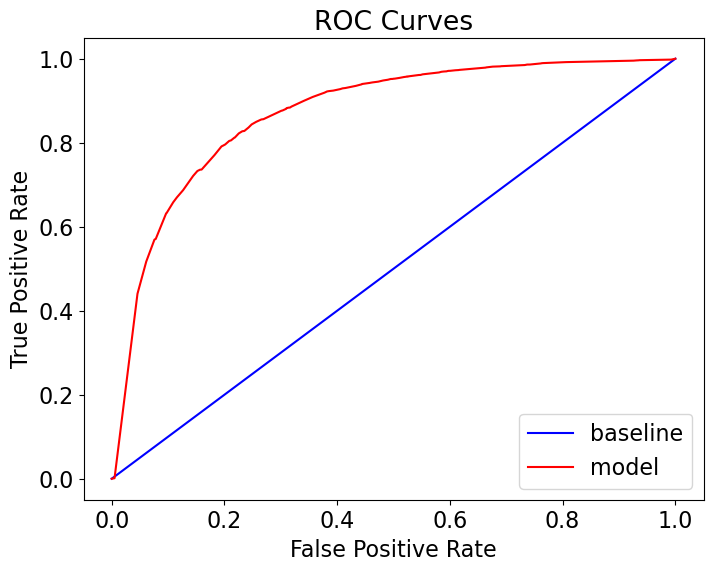

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

evaluate_model(predictions, probs, train_predictions, train_probs)

### Confusion Matrix

Confusion matrix, without normalization
[[ 2903  2695]
 [ 1261 23057]]


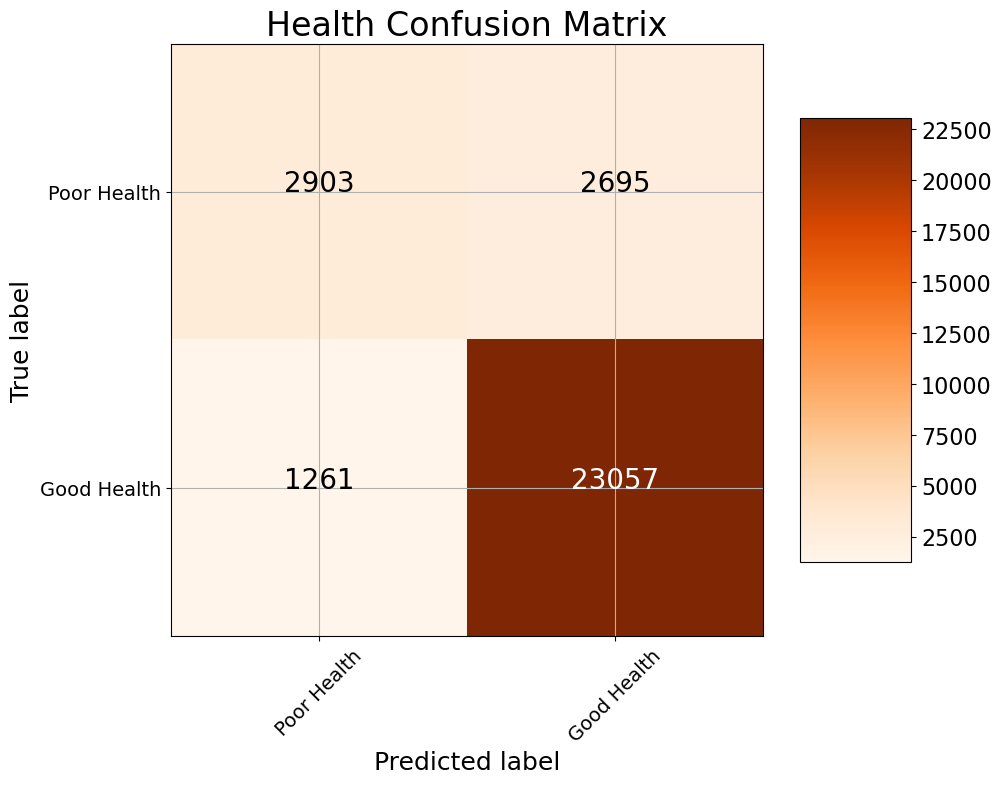

In [10]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)
cm = confusion_matrix(test_labels, predictions)
plot_confusion_matrix(cm, classes = ['Poor Health', 'Good Health'],
                      title = 'Health Confusion Matrix')

### Feature Importances

In [11]:
features = list(train.columns)
fi = pd.DataFrame({'feature': features,
                   'importance': tree.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head()

,feature,importance
66,DIFFWALK,0.433055
22,PHYSHLTH,0.328946
58,INTERNET,0.032298
45,DIABETE3,0.028102
230,_MICHD,0.018414


# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1,
                               max_depth=8)

# Fit on training data
model.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.3s finished


RandomForestClassifier(max_depth=8, max_features='sqrt', n_jobs=-1,
                       random_state=50, verbose=1)

In [13]:
# n_nodes = []
# max_depths = []

# for ind_tree in model.estimators_:
#     n_nodes.append(ind_tree.tree_.node_count)
#     max_depths.append(ind_tree.tree_.max_depth)
    
# print(f'Average number of nodes {int(np.mean(n_nodes))}')
# print(f'Average maximum depth {int(np.mean(max_depths))}')

### Random Forest Results

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


Recall Baseline: 1.0 Test: 0.98 Train: 0.98
Precision Baseline: 0.81 Test: 0.87 Train: 0.88
Roc Baseline: 0.5 Test: 0.89 Train: 0.9


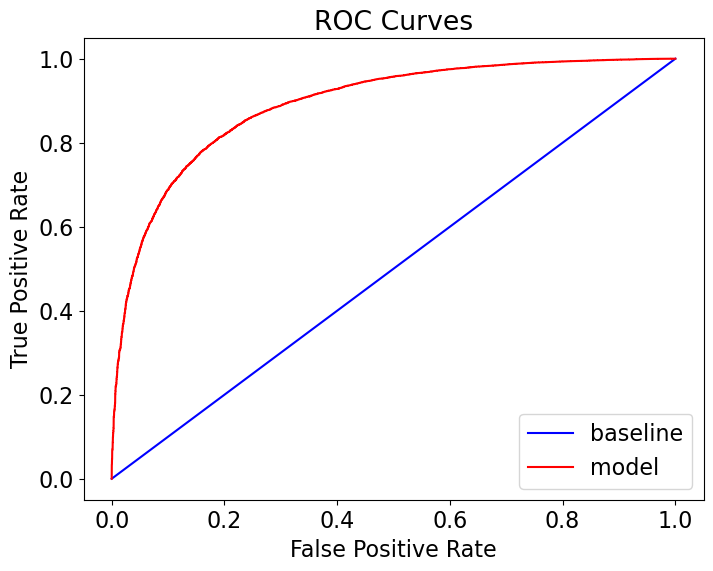

In [14]:
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

Confusion matrix, without normalization
[[ 2207  3391]
 [  593 23725]]


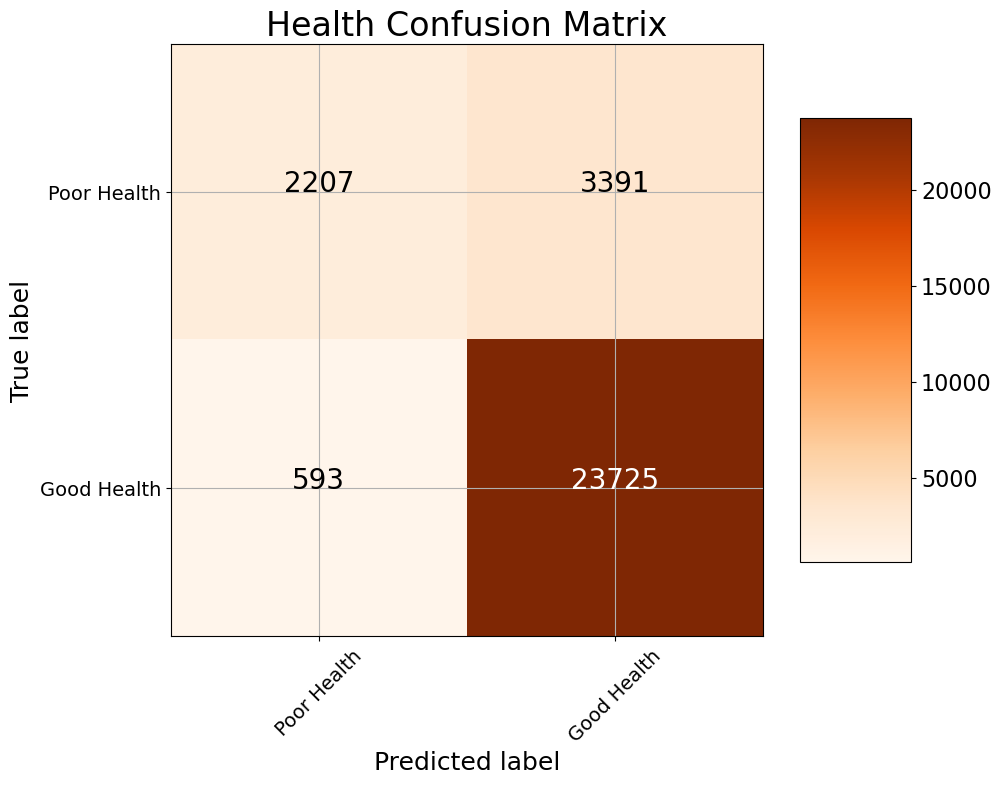

In [15]:
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['Poor Health', 'Good Health'],
                      title = 'Health Confusion Matrix')

In [16]:
fi_model = pd.DataFrame({'feature': features,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
66,DIFFWALK,0.103828
22,PHYSHLTH,0.085673
62,QLACTLM2,0.075176
24,POORHLTH,0.067968
55,EMPLOY1,0.042350
68,DIFFALON,0.041530
63,USEEQUIP,0.033924
94,ARTHSOCL,0.032708
311,_LMTSCL1,0.028347
95,JOINPAIN,0.024257
